58Y HW4

#**Emre Girgin**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
data_length = 500
duration = 10.0
dt = duration / data_length
time = np.reshape(np.linspace(0, duration, num = data_length), (data_length,1))
a = np.cos(time)
b = -0.003*(time**3) -0.005*(time**2) +0.001*time
z = np.sin(0.5*time)+ a + b
#plt.plot(z)

In [2]:
alpha = 0.02 # α is a constant representing the convergence rate of the phase variable from 1 to 0.
tao = 1
K = 25
D = 2 * np.sqrt(K)

In [3]:
v = (z[1:]-z[:-1])*tao/dt # TODO *tao ? 
v = np.concatenate([[v[0]], v])

a = (v[1:]-v[:-1])/dt
a = np.concatenate([[a[0]], a])
"""
plt.plot(z)
plt.plot(v)
plt.plot(a)
plt.legend(["x", "v", "a"])"""

'\nplt.plot(z)\nplt.plot(v)\nplt.plot(a)\nplt.legend(["x", "v", "a"])'

In [4]:
def phi(S, i):
    c = np.logspace(-3,0,num=i) # centers of basis functions
    h = i/(c**2) # widths of basis functions

    return np.exp(-h*(S-c)**2)

def f_target(s):
    g = z[-1]
    x0 = z[0]

    #return (-K * (g - z[:, 0]) + D * v[:, 0] + tao * a[:, 0]) / (g - x0)

    return - (g - z[:, 0]) + (g - x0) * s[:, 0] + (tao * a[:, 0] + D * v[:, 0]) / K

def s(alpha, tao, t):
    return np.exp(-(alpha * t)/tao)

def f_s(weights, phi, s):

    nominator = np.zeros((weights.shape[1]))
    denominator = np.zeros((weights.shape[1]))

    for basis in range(weights.shape[0]):
        nominator += weights[basis] * phi[:, basis] * S[:,0]

    for basis in range(weights.shape[0]):
        denominator +=  phi[:, basis]

    return nominator / denominator

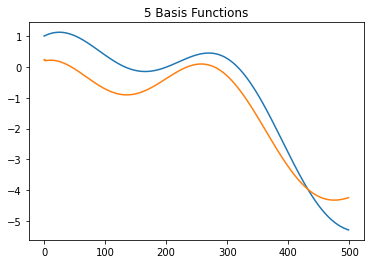

In [5]:
BF_number = 5
S = s(alpha, tao, time)

X = phi(S, BF_number)
y = f_target(S) * np.sum(X, axis=1) / S

w = np.linalg.pinv(X) @ y

plt.plot(z)
plt.plot(f_s(w, X, S))
plt.title("{} Basis Functions".format(BF_number))
plt.show()

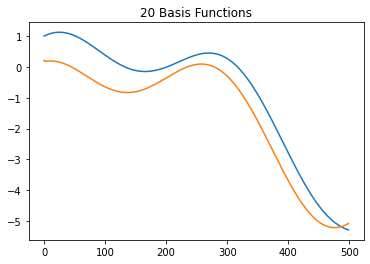

In [6]:
BF_number = 20
S = s(alpha, tao, time)

X = phi(S, BF_number)
y = f_target(S) * np.sum(X, axis=1) / S

w = np.linalg.pinv(X) @ y

plt.plot(z)
plt.plot(f_s(w, X, S))
plt.title("{} Basis Functions".format(BF_number))
plt.show()

In [7]:
z_orig = z.copy()
v_orig = v.copy()
a_orig = a.copy()
time_orig = time.copy()

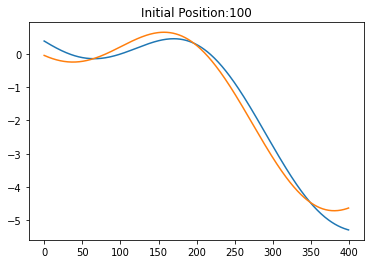

In [8]:
BF_number = 20
init = 100

time = time_orig
z = z_orig
v = v_orig
a = a_orig

time = time[init:]
z = z[init:]
v = v[init:]
a = a[init:]


S = s(alpha, tao, time)

X = phi(S, BF_number)
y = f_target(S) * np.sum(X, axis=1) / S

w = np.linalg.pinv(X) @ y

plt.plot(z)
plt.plot(f_s(w, X, S))
plt.title("Initial Position:{}".format(init))
plt.show()

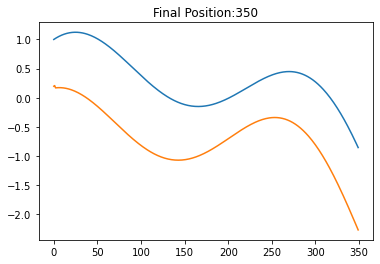

In [9]:
BF_number = 20

final = 350

time = time_orig
z = z_orig
v = v_orig
a = a_orig

time = time[:final]
z = z[:final]
v = v[:final]
a = a[:final]


S = s(alpha, tao, time)

X = phi(S, BF_number)
y = f_target(S) * np.sum(X, axis=1) / S

w = np.linalg.pinv(X) @ y

plt.plot(z)
plt.plot(f_s(w, X, S))
plt.title("Final Position:{}".format(final))
plt.show()

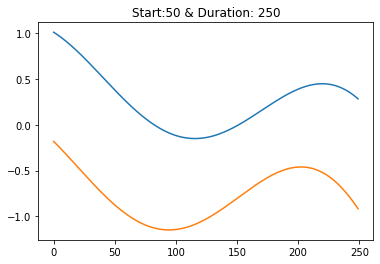

In [10]:
BF_number = 20

init=50
duration = 250

time = time_orig
z = z_orig
v = v_orig
a = a_orig

time = time[init:init+duration]
z = z[init:init+duration]
v = v[init:init+duration]
a = a[init:init+duration]

S = s(alpha, tao, time)

X = phi(S, BF_number)
y = f_target(S) * np.sum(X, axis=1) / S

w = np.linalg.pinv(X) @ y

plt.plot(z)
plt.plot(f_s(w, X, S))
plt.title("Start:{} & Duration: {}".format(init, duration))
plt.show()

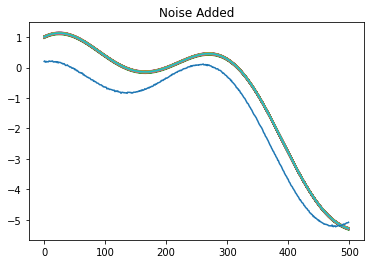

In [11]:
#TODO
BF_number = 20

noise = np.random.randn(time_orig.shape[0]) / 100

time = time_orig
z = z_orig
v = v_orig
a = a_orig

z = z_orig + noise

v = (z[1:]-z[:-1])*tao/dt # TODO *tao ? 
v = np.concatenate([[v[0]], v])

a = (v[1:]-v[:-1])/dt
a = np.concatenate([[a[0]], a])

S = s(alpha, tao, time)

X = phi(S, BF_number)
y = f_target(S) * np.sum(X, axis=1) / S

w = np.linalg.pinv(X) @ y

plt.plot(z)
plt.plot(f_s(w, X, S))

plt.title("Noise Added")
plt.show()